In [1]:
import numpy as np
from pyparsing import alphas
from scipy.ndimage import histogram

from homemade.utils.features import prepare_for_training

class MLLinearRegression:
    def __init__(self, data, labels, polynomial_degree=0, sinusoid_degree=0, normalize_data=True):
        (data_processed,
         features_mean,
         features_deviation) = prepare_for_training(data, polynomial_degree, sinusoid_degree, normalize_data)
        self.data = data_processed
        self.labels = labels
        self.polynomial_degree = polynomial_degree
        self.sinusoid_degree = sinusoid_degree
        self.normalize_data = normalize_data

        self.features_mean = features_mean
        self.features_deviation = features_deviation

        num_features = self.data.shape[1]
        ## 初始化权重
        self.theta = np.zeros((num_features, 1))

    def train(self, alpha, num_iterations=500):
        cost_history = self.gradient_descent(alpha, num_iterations)
        return self.theta, cost_history

    def gradient_descent(self, alpha, num_iterations=500):
        cost_history = []
        for _ in range(num_iterations):
            self.gradient_step(alpha)
            cost_history.append(self.cost_function(self.data, self.labels))
        return cost_history

    def gradient_step(self, alpha):
        num_examples = self.data.shape[0]
        pred = MLLinearRegression.hypothesis(self.data, self.theta)
        ## 残差
        delta = pred - self.labels
        theta = self.theta
        theta = theta - alpha * (1/num_examples) * (delta.T @ self.data).T
        self.theta = theta

    def cost_function(self, data, labels):
        num_examples = data.shape[0]
        delta = MLLinearRegression.hypothesis(data, self.theta) - labels
        cost = (1 / (2 * num_examples)) * (delta.T @ delta)
        return cost[0][0]

    def get_cost(self, data, labels):
        (data_processed,
         features_mean,
         features_deviation) = prepare_for_training(data, self.polynomial_degree, self.sinusoid_degree, self.normalize_data)
        return self.cost_function(data_processed, labels)

    def predict(self, data):
        (data_processed,
         features_mean,
         features_deviation) = prepare_for_training(data, self.polynomial_degree, self.sinusoid_degree, self.normalize_data)
        return MLLinearRegression.hypothesis(data_processed, self.theta)

    @staticmethod
    def hypothesis(data, theta):
        pred = data @ theta
        return pred


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../../data/world-happiness-report-2017.csv')
data.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

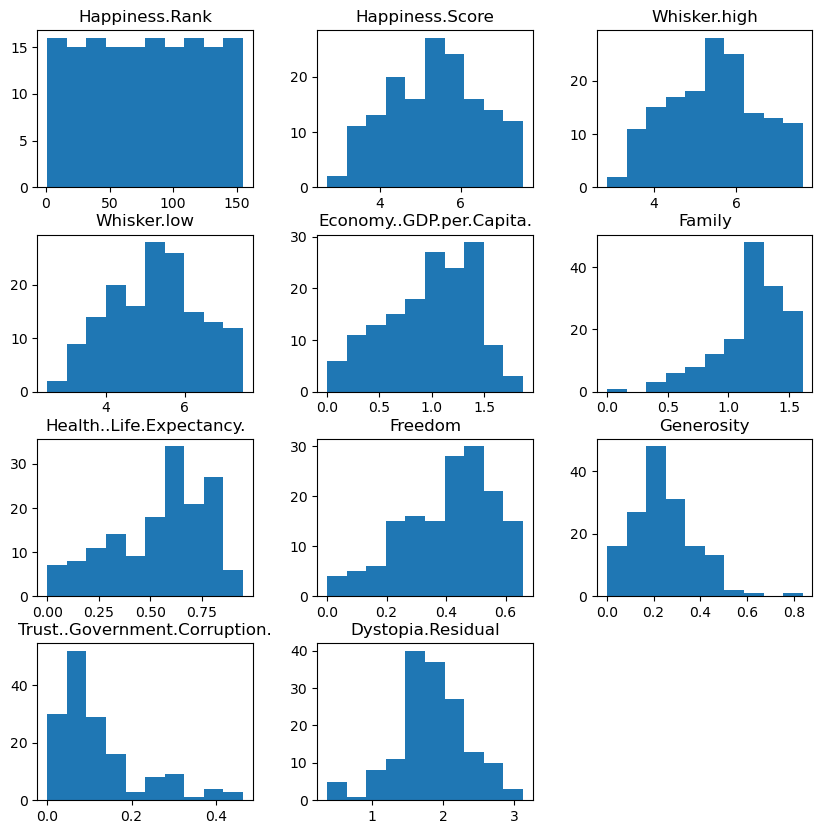

In [4]:
histograms = data.hist(grid=False, figsize=(10, 10))

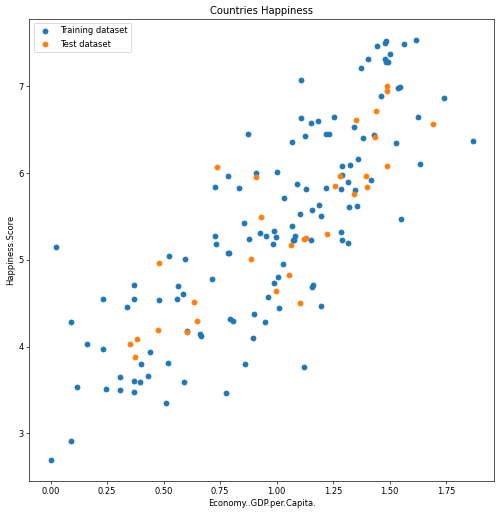

In [5]:
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

input_param_name = 'Economy..GDP.per.Capita.'
output_param_name = 'Happiness.Score'

x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values

x_test = test_data[[input_param_name]].values
y_test = test_data[[output_param_name]].values

plt.figure(figsize=(10, 10), dpi=60)
plt.scatter(x_train, y_train, label='Training dataset')
plt.scatter(x_test, y_test, label='Test dataset')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Countries Happiness')
plt.legend()
plt.show()

In [10]:
learning_rate = 0.01
num_iterations = 500
linear_regression = MLLinearRegression(x_train, y_train)

(theta, cost_history) = linear_regression.train(learning_rate, num_iterations)
print('开始损失', cost_history[0])
print('优化后的损失', cost_history[-1])

开始损失 14.671543279987908
优化后的损失 0.2396389862112397


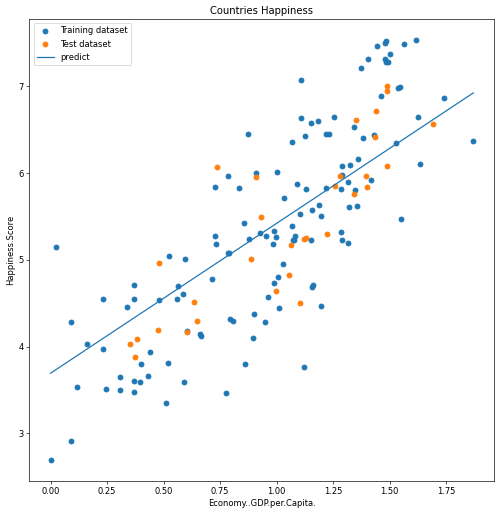

In [23]:
x_predictions = np.linspace(min(x_train), max(x_train), 100)
y_predictions = linear_regression.predict(x_predictions)

plt.figure(figsize=(10, 10), dpi=60)
plt.scatter(x_train, y_train, label='Training dataset')
plt.scatter(x_test, y_test, label='Test dataset')
plt.plot(x_predictions, y_predictions, label='predict')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Countries Happiness')
plt.legend()
plt.show()
plt.show()

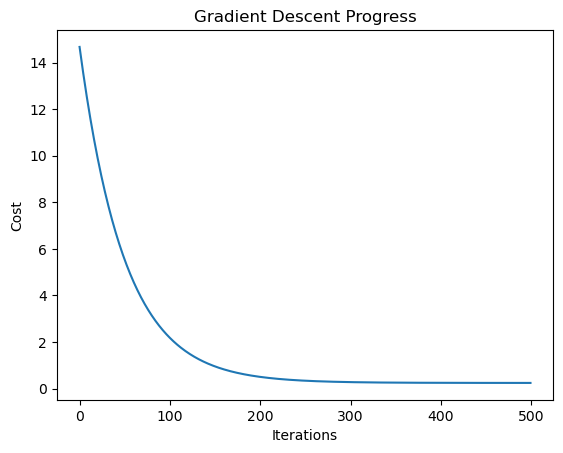

In [7]:
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
plt.show()

In [11]:
w = np.array([[1],[2],[3]])
w

array([[1],
       [2],
       [3]])

In [12]:
w.T

array([[1, 2, 3]])

In [16]:
x = np.array([[1,1,1],[2,2,2],[3,3,3]])
w.T * x

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [14]:
w.T @ x

array([[14, 14, 14]])

In [20]:
delta = np.array([[1],
                  [2],
                  [3]])
res = (delta.T @ delta)
res.shape, res[0,0]

np.int64(14)

In [24]:
data = pd.read_csv('../../data/non-linear-regression-x-y.csv')
data.head(10)

,y,x
0,97.58776,1.0
1,97.76344,2.0
2,96.56705,3.0
3,92.52037,4.0
4,91.15097,5.0
5,95.21728,6.0
6,90.21355,7.0
7,89.29235,8.0
8,91.51479,9.0
9,89.60966,10.0


In [34]:
x = data[['x']].values
y = data[['y']].values
x.shape, y.shape

((250, 1), (250, 1))

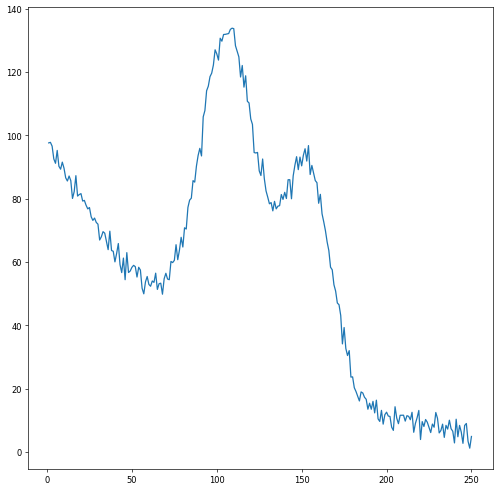

In [35]:
plt.figure(figsize=(10, 10), dpi=60)
plt.plot(x, y)
plt.show()

In [40]:
learning_rate = 0.01
num_iterations = 5000
sinusoid_degree = 15
polynomial_degree = 15
linear_regression = MLLinearRegression(x, y, sinusoid_degree, polynomial_degree, True)

(theta, cost_history) = linear_regression.train(learning_rate, num_iterations)
print('开始损失', cost_history[0])
print('优化后的损失', cost_history[-1])

开始损失 2322.5164294103674
优化后的损失 52.34186186288397


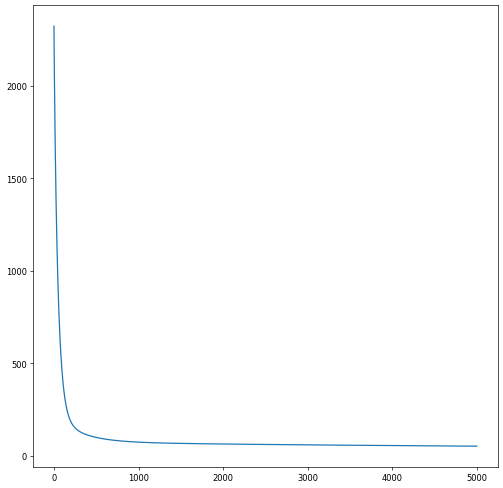

In [41]:
plt.figure(figsize=(10, 10), dpi=60)
plt.plot(range(num_iterations), cost_history)
plt.show()

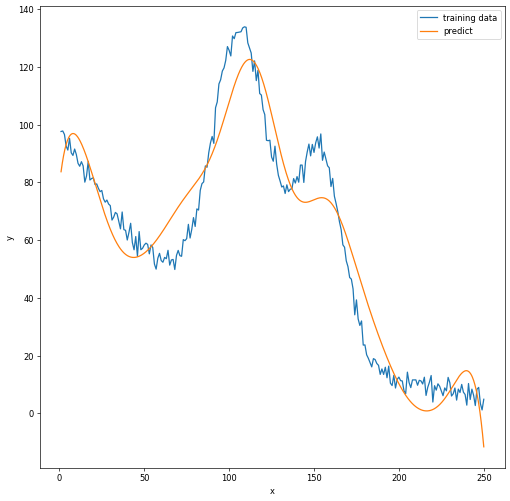

In [43]:
x_test = np.linspace(min(x), max(x), 1000)
y_test = linear_regression.predict(x_test)
plt.figure(figsize=(10, 10), dpi=60)
plt.plot(x, y, label='training data')
plt.plot(x_test, y_test, label='predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [48]:

mnist_data = pd.read_csv('../../data/mnist-demo.csv')
mnist_data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
digit_label = mnist_data.loc[:, 'label']
digit_label

0       5
1       0
2       4
3       1
4       9
       ..
9995    5
9996    8
9997    6
9998    9
9999    7
Name: label, Length: 10000, dtype: int64

In [52]:
digit_pixels = mnist_data.iloc[:, 1:]
digit_pixels

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1000x1000 with 0 Axes>

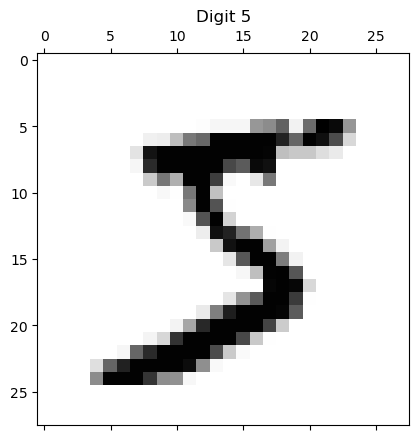

<Figure size 1000x1000 with 0 Axes>

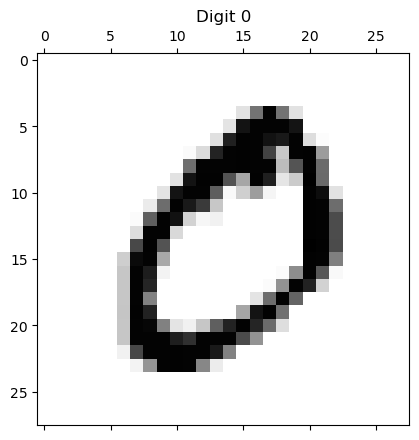

<Figure size 1000x1000 with 0 Axes>

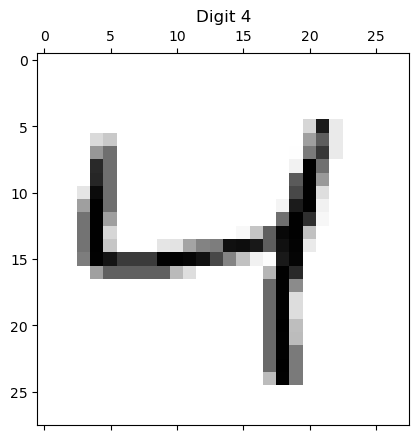

<Figure size 1000x1000 with 0 Axes>

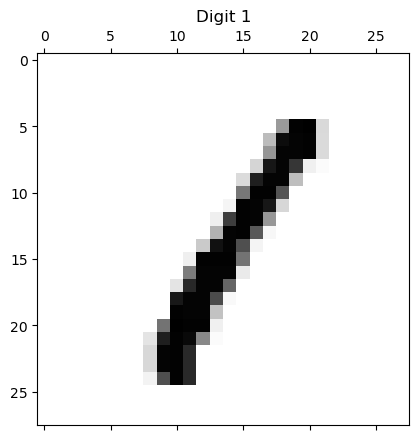

<Figure size 1000x1000 with 0 Axes>

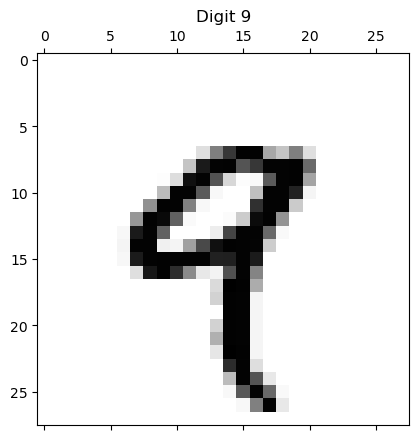

<Figure size 1000x1000 with 0 Axes>

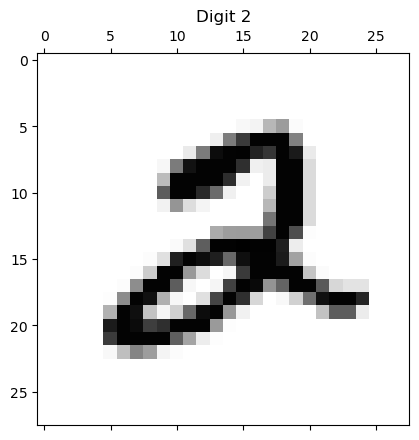

<Figure size 1000x1000 with 0 Axes>

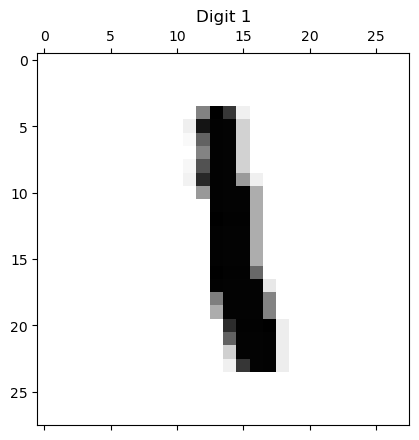

<Figure size 1000x1000 with 0 Axes>

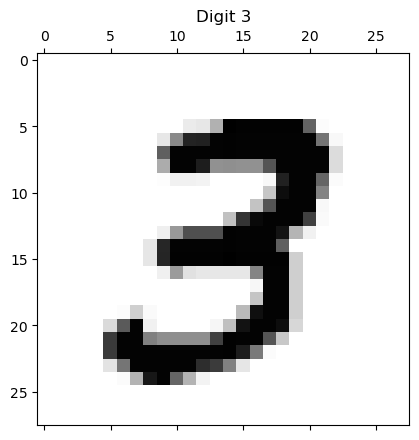

<Figure size 1000x1000 with 0 Axes>

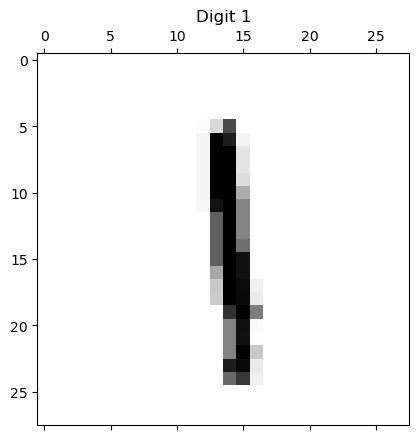

<Figure size 1000x1000 with 0 Axes>

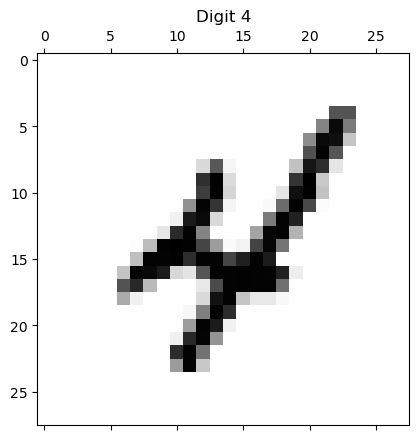

In [79]:

def show_image(index):
    img = np.reshape(digit_pixels.loc[index, :], (28, 28))
    plt.figure(figsize=(10, 10))
    plt.matshow(img, cmap='Greys')
    plt.title('Digit {}'.format(digit_label[index]))
    plt.show()

for i in range(10):
    show_image(i)

In [80]:
np.random.permutation(10)

array([0, 2, 6, 9, 5, 4, 1, 3, 7, 8])

In [85]:
from sklearn.datasets import load_digits
sk_digit_data = load_digits()
sk_digit_data.data.shape, sk_digit_data.target.shape, sk_digit_data.target.shape

((1797, 64), (1797,))

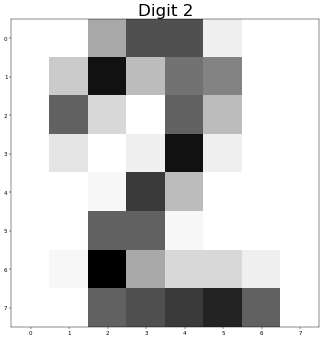

In [103]:

def show_digit(index):
    global sk_digit_data
    digit = sk_digit_data.data[index]
    digit_img = digit.reshape(8, -1)
    plt.figure(figsize=(10, 10), dpi=40)
    plt.imshow(digit_img, cmap='Greys')
    plt.title('Digit {}'.format(sk_digit_data.target[index]), fontsize=30)
    plt.show()

show_digit(369)

In [111]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=500, random_state=42)
cross_val_score(sgd_clf, sk_digit_data.data, sk_digit_data.target, cv=3)

array([0.9115192 , 0.93489149, 0.89983306])

In [126]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sgd_clf = SGDClassifier(max_iter=500, random_state=42)

sf_kfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in sf_kfolds.split(X_train, y_train):
    # print(train_index.shape, test_index.shape)
    # print(train_index[:10], test_index[:10])
    sgd_clf_new = clone(sgd_clf)
    X_kf_train, X_kf_test = X_train[train_index], X_train[test_index]
    y_kf_train, y_kf_test = y_train[train_index], y_train[test_index]
    sgd_clf_new.fit(X_kf_train, y_kf_train)
    sgd_pred = sgd_clf_new.predict(X_kf_test)
    n_correct = sum(y_kf_test == sgd_pred)
    print('预测正确个数:', n_correct ,"/", len(y_kf_test), 'accuracy:', n_correct / len(y_kf_test))



预测正确个数: 455 / 479 accuracy: 0.9498956158663883
预测正确个数: 449 / 479 accuracy: 0.9373695198329853
预测正确个数: 459 / 479 accuracy: 0.9582463465553236


In [125]:
a = np.array([[1,2],[2,3],[3,4]])
b = np.array([[2,2],[2,2],[3,4]])
a == b

array([[False,  True],
       [ True, False],
       [ True,  True]])

In [129]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train == 0
y_test = y_test == 0

sgd_clf = SGDClassifier(max_iter=500, random_state=42)

sf_kfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in sf_kfolds.split(X_train, y_train):
    # print(train_index.shape, test_index.shape)
    # print(train_index[:10], test_index[:10])
    sgd_clf_new = clone(sgd_clf)
    X_kf_train, X_kf_test = X_train[train_index], X_train[test_index]
    y_kf_train, y_kf_test = y_train[train_index], y_train[test_index]
    sgd_clf_new.fit(X_kf_train, y_kf_train)
    sgd_pred = sgd_clf_new.predict(X_kf_test)
    n_correct = sum(y_kf_test == sgd_pred)
    print('预测正确个数:', n_correct ,"/", len(y_kf_test), 'accuracy:', n_correct / len(y_kf_test))

预测正确个数: 477 / 479 accuracy: 0.9958246346555324
预测正确个数: 478 / 479 accuracy: 0.9979123173277662
预测正确个数: 478 / 479 accuracy: 0.9979123173277662


In [135]:
from sklearn.model_selection import cross_val_predict
cv_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
print(cv_pred)
## 混淆矩阵
import  sklearn.metrics as sm
sm.precision_score(y_train, cv_pred), sm.recall_score(y_train, cv_pred), sm.f1_score(y_train, cv_pred)

[False  True  True ... False False False]


(0.9930555555555556, 0.9862068965517241, 0.9896193771626297)

In [136]:
sm.confusion_matrix(y_train, cv_pred)
# tn, fp
# fn, tp

array([[1291,    1],
       [   2,  143]])

In [146]:
sgd_clf.fit(X_train, y_train)
y_test_scores = sgd_clf.decision_function(X_test)
y_test_scores > 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [148]:
precisions, recalls, thresholds = sm.precision_recall_curve(y_test, y_test_scores)

In [149]:
precisions

array([0.09166667, 0.09192201, 0.09217877, 0.09243697, 0.09269663,
       0.09295775, 0.09322034, 0.09348442, 0.09375   , 0.09401709,
       0.09428571, 0.09455587, 0.09482759, 0.09510086, 0.09537572,
       0.09565217, 0.09593023, 0.09620991, 0.09649123, 0.09677419,
       0.09705882, 0.09734513, 0.09763314, 0.09792285, 0.09821429,
       0.09850746, 0.0988024 , 0.0990991 , 0.09939759, 0.09969789,
       0.1       , 0.10030395, 0.10060976, 0.10091743, 0.10122699,
       0.10153846, 0.10185185, 0.10216718, 0.10248447, 0.10280374,
       0.103125  , 0.10344828, 0.10377358, 0.10410095, 0.10443038,
       0.1047619 , 0.10509554, 0.10543131, 0.10576923, 0.10610932,
       0.10645161, 0.10679612, 0.10714286, 0.10749186, 0.10784314,
       0.10819672, 0.10855263, 0.10891089, 0.10927152, 0.10963455,
       0.11      , 0.11036789, 0.11073826, 0.11111111, 0.11148649,
       0.11186441, 0.1122449 , 0.11262799, 0.1130137 , 0.11340206,
       0.1137931 , 0.11418685, 0.11458333, 0.11498258, 0.11538

In [151]:
y_test.shape, precisions.shape

((360,), (361,))

In [152]:
recalls

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [153]:
recalls.shape

(361,)

In [154]:
thresholds

array([-6239.86628744, -6032.04108419, -6020.8622224 , -6017.81344191,
       -5982.24433622, -5808.46384842, -5800.8418972 , -5693.62645004,
       -5482.7524663 , -5455.31344191, -5426.35002728, -5418.72807606,
       -5404.50043378, -5404.50043378, -5302.36628744, -5279.50043378,
       -5210.39474273, -5167.7118159 , -5144.33783216, -5029.50043378,
       -5022.89474273, -4995.96384842, -4986.81750695, -4984.78498663,
       -4984.78498663, -4980.2118159 , -4972.58986468, -4971.57360452,
       -4952.26466143, -4952.26466143, -4938.03701915, -4912.122385  ,
       -4863.3418972 , -4852.67116549, -4833.87035248, -4802.87441752,
       -4802.36628744, -4767.81344191, -4767.30531183, -4713.44352321,
       -4702.26466143, -4701.24840126, -4684.48010858, -4670.2524663 ,
       -4669.23620614, -4611.81750695, -4596.57360452, -4595.04921427,
       -4577.77279151, -4576.75653134, -4562.02075899, -4552.36628744,
       -4540.17116549, -4534.5817346 , -4523.40287281, -4506.12645004,
      

In [155]:
thresholds.shape

(360,)

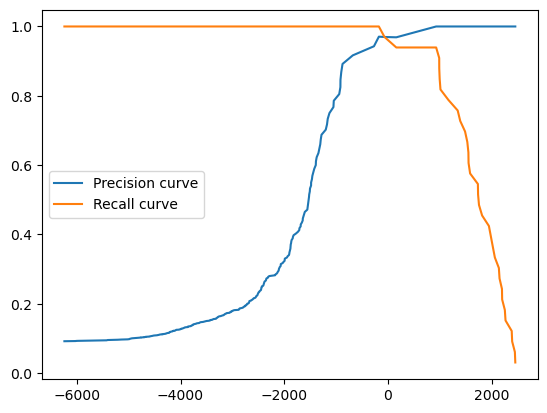

In [158]:
def plot_precision_recall_curve(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], label='Precision curve')
    plt.plot(thresholds, recalls[:-1], label='Recall curve')
    plt.legend()
    plt.show()

plot_precision_recall_curve(precisions, recalls, thresholds)

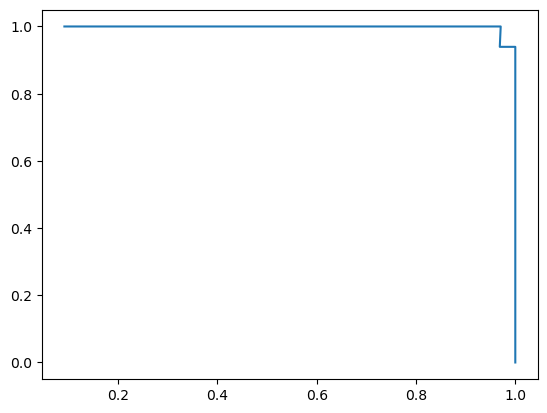

In [159]:
plt.plot(precisions, recalls, label='Precision curve')

Text(0, 0.5, 'True positive rate')

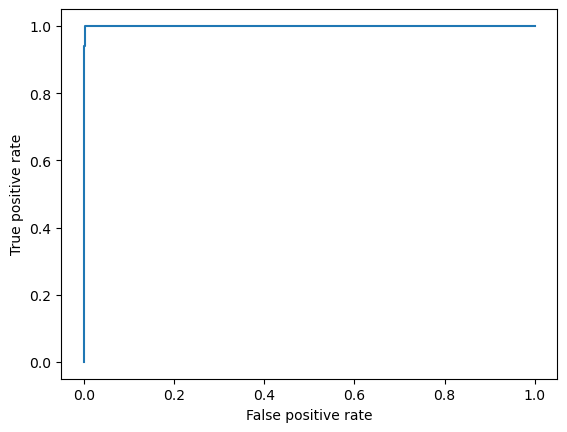

In [160]:
fpr, tpr, thresholds = sm.roc_curve(y_test, y_test_scores)

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


In [161]:
sm.roc_auc_score(y_test, y_test_scores)

np.float64(0.999814660365119)

In [176]:
## 正规方程 -- 知道就好
import numpy as np
np.random.seed(42)
X = 2*np.random.rand(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
y = 4 + 3*X + np.random.randn(100, 1)
X_b, y

(array([[1.        , 0.74908024],
        [1.        , 1.90142861],
        [1.        , 1.46398788],
        [1.        , 1.19731697],
        [1.        , 0.31203728],
        [1.        , 0.31198904],
        [1.        , 0.11616722],
        [1.        , 1.73235229],
        [1.        , 1.20223002],
        [1.        , 1.41614516],
        [1.        , 0.04116899],
        [1.        , 1.9398197 ],
        [1.        , 1.66488528],
        [1.        , 0.42467822],
        [1.        , 0.36364993],
        [1.        , 0.36680902],
        [1.        , 0.60848449],
        [1.        , 1.04951286],
        [1.        , 0.86389004],
        [1.        , 0.58245828],
        [1.        , 1.22370579],
        [1.        , 0.27898772],
        [1.        , 0.5842893 ],
        [1.        , 0.73272369],
        [1.        , 0.91213997],
        [1.        , 1.57035192],
        [1.        , 0.39934756],
        [1.        , 1.02846888],
        [1.        , 1.18482914],
        [1.   

In [177]:
## 正规方程
thetas = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
thetas

array([[4.21509616],
       [2.77011339]])

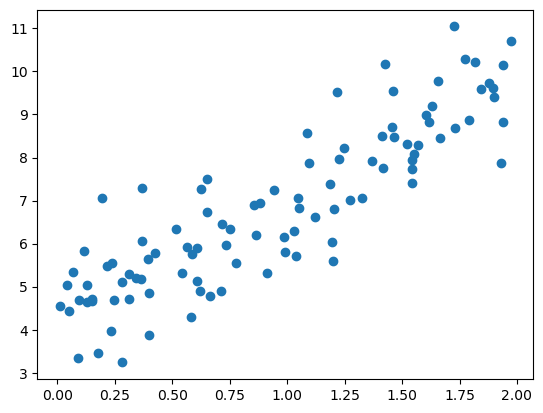

In [178]:
plt.scatter(X, y)
plt.show()

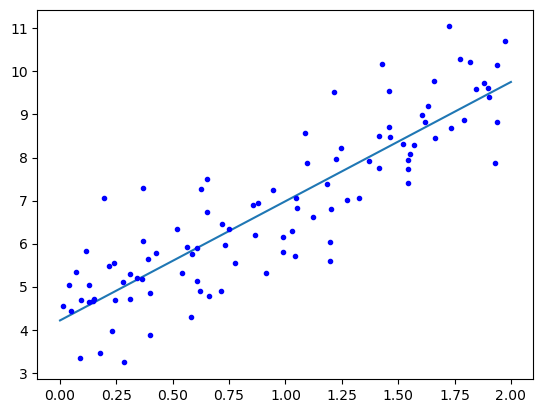

In [197]:
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
# print(X_test_b)
plt.plot(X_test, X_test_b.dot(thetas))
plt.plot(X, y, 'b.')
plt.show()

In [198]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_ ## 拟合后的权重和偏置是一样的

(array([[2.77011339]]), array([4.21509616]))

In [199]:
## 梯度下降法
lr = 0.1
n_iterations = 1000
num = 100 ## 样本数
thetas_new = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2/num * X_b.T.dot(X_b.dot(thetas_new) - y)
    thetas_new = thetas_new - lr * gradients

In [200]:
thetas_new

array([[4.21509616],
       [2.77011339]])

BGD: [[0.01300189]
 [1.45353408]]


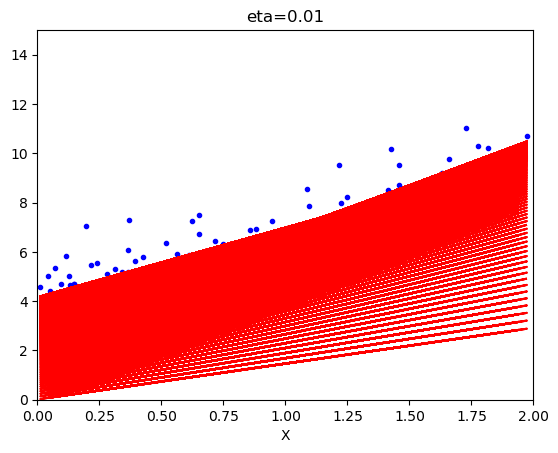

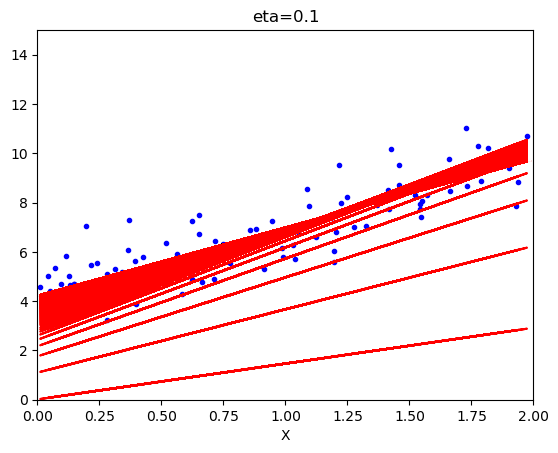

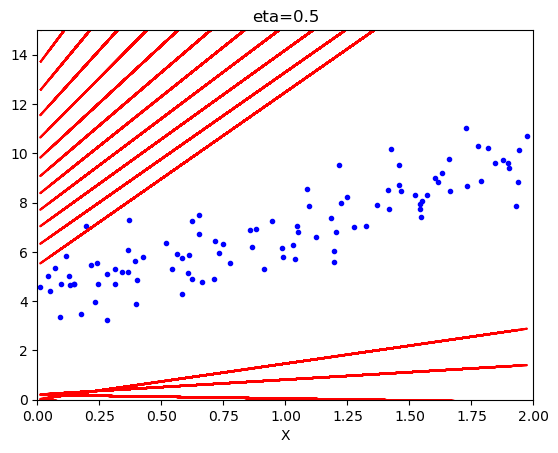

In [250]:
## 批量梯度 -- 不同学习率的影响
np.random.seed(42)
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)
theta_path_bgd=[]
def plot_gradient_descent(X, y, theta, eta, theta_path = None):
    m = len(X)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        plt.plot(X.flatten(), X_b.dot(theta), 'r')
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path_bgd.append(theta)
    plt.xlabel('X')
    plt.axis((0, 2, 0, 15))
    plt.title(f'eta={eta}')
    plt.show()

theta = np.random.randn(2, 1)
print('BGD:', theta)
plot_gradient_descent(X, y, theta, 0.01)
plot_gradient_descent(X, y, theta, 0.1, theta_path_bgd)
plot_gradient_descent(X, y, theta, 0.5)


SGD: [[0.01300189]
 [1.45353408]]


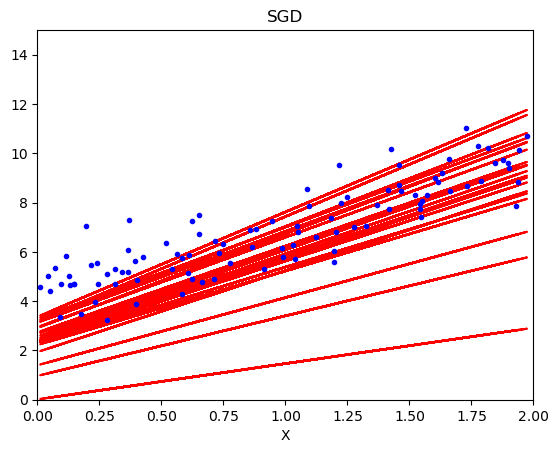

In [251]:
## 随机梯度
np.random.seed(42)
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)
theta_path_sgd=[]

## 随机梯度法
t0 = 5
t1 = 50
n_epochs = 50 ## 一个epoch代表所有的样本执行过一遍
## 随机梯度下降法,必须让学习率逐渐下降,才能保证最后收敛
def learning_schedule(t):
    return t0/(t1 + t)

theta = np.random.randn(2, 1)
print('SGD:', theta)
X_b = np.c_[np.ones((X.shape[0], 1)), X]
m = len(X)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_pred = X_b.dot(theta)
            plt.plot(X, y_pred, 'r-')
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_schedule(epoch * n_epochs + i) * gradients
        theta_path_sgd.append(theta)
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.axis((0, 2, 0, 15))
plt.title('SGD')
plt.show()



MGD: [[0.01300189]
 [1.45353408]]


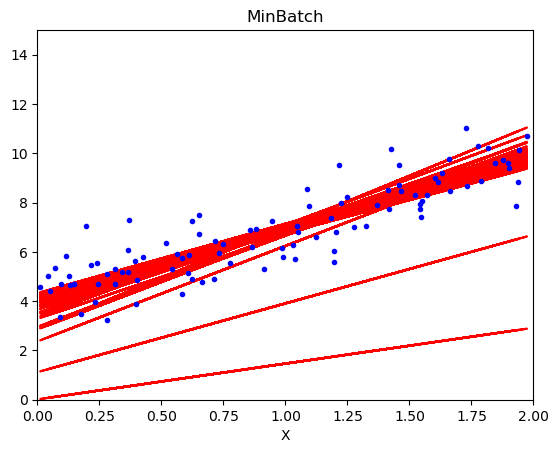

In [254]:
## 小批量梯度下降
np.random.seed(42)
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)
theta_path_mgd=[]

eta = 0.1
minBatch = 16
n_epochs = 50 ## 一个epoch代表所有的样本执行过一遍

theta = np.random.randn(2, 1)
print('MGD:', theta)
X_b = np.c_[np.ones((X.shape[0], 1)), X]
t=0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, len(X), minBatch):
        t+=1
        y_pred = X_b.dot(theta)
        plt.plot(X, y_pred, 'r-')
        xi = X_b_shuffled[i:t*minBatch+i]
        yi = y_shuffled[i:t*minBatch+i]
        gradients = 2/minBatch * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_schedule(t) * gradients
        theta_path_mgd.append(theta)
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.axis((0, 2, 0, 15))
plt.title('MinBatch')
plt.show()



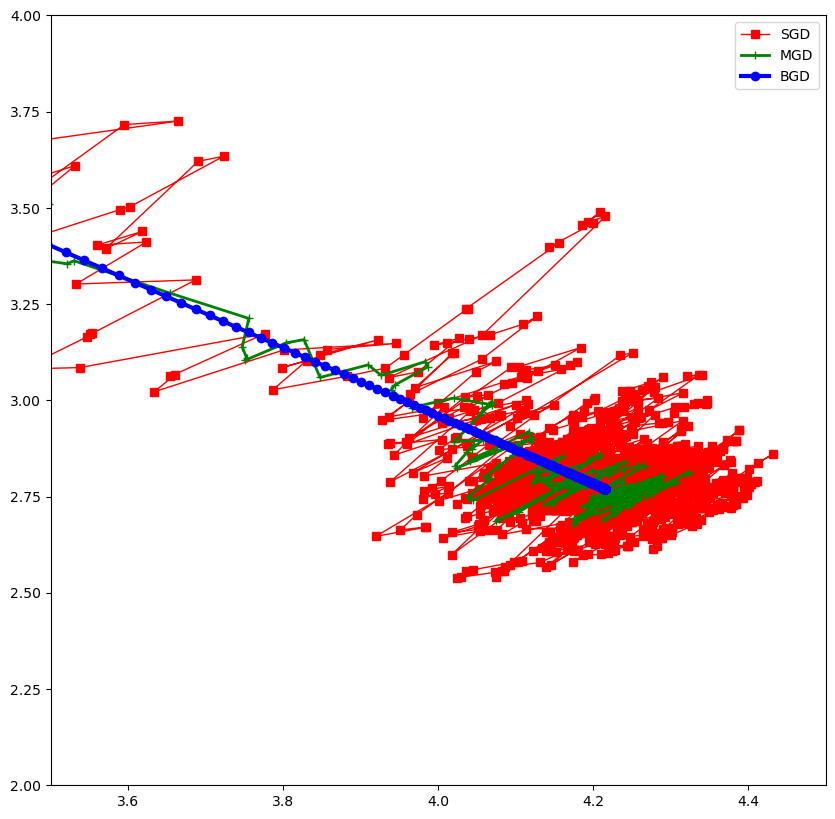

In [261]:
## 三种梯度下降效果比较
theta_path_mgd = np.array(theta_path_mgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_bgd = np.array(theta_path_bgd)

plt.figure(figsize=(10, 10))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], 'r-s', linewidth=1,label='SGD')
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], 'g-+', linewidth=2,label='MGD')
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], 'b-o', linewidth=3, label='BGD')
plt.legend()
plt.axis((3.5, 4.5, 2.0, 4.0))
plt.show()

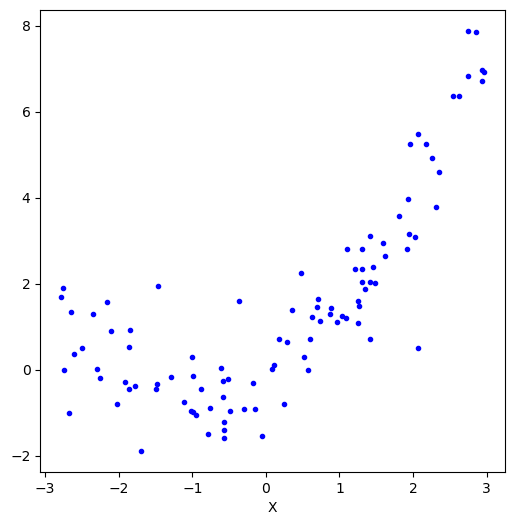

In [280]:
### 多项式回归
np.random.seed(6)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + np.random.randn(m, 1)

plt.figure(figsize=(6, 6))
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.show()

拟合后的偏执和模型x和x2的系数 [-0.21865419] [[0.93366893 0.56456263]]


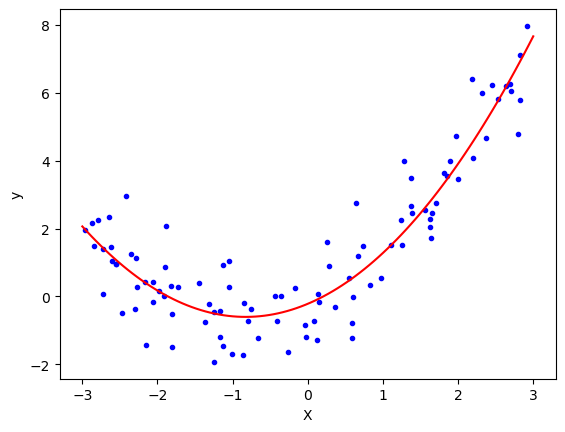

In [308]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + np.random.randn(m, 1)

pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pf.fit_transform(X)
lr = LinearRegression()
lr.fit(X_poly, y)
print('拟合后的偏执和模型x和x2的系数', lr.intercept_, lr.coef_)

X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
X_test_poly = pf.transform(X_test) ## 注意这里不要fit, fit是根据degree计算,然后内部设置好参数, transform是根据参数将计算后的结果整合返回
y_pred = lr.predict(X_test_poly)

plt.plot(X.reshape(1, -1), y.reshape(1, -1), 'b.')
plt.plot(X_test, y_pred, 'r-')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


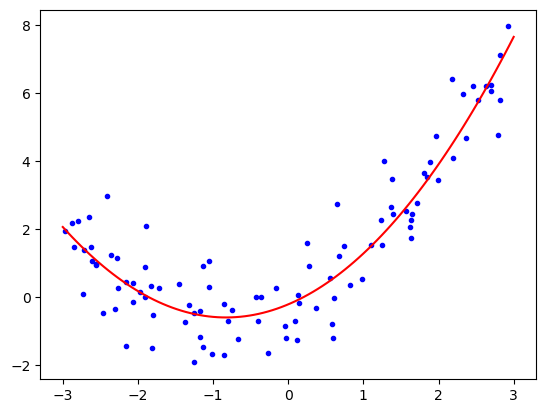

In [310]:
### 采用pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('std', StandardScaler()),
    ('linear', LinearRegression())
])

pipline.fit(X, y)
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = pipline.predict(X_test)

plt.plot(X, y, 'b.')
plt.plot(X_test, y_pred, 'r-')
plt.show()


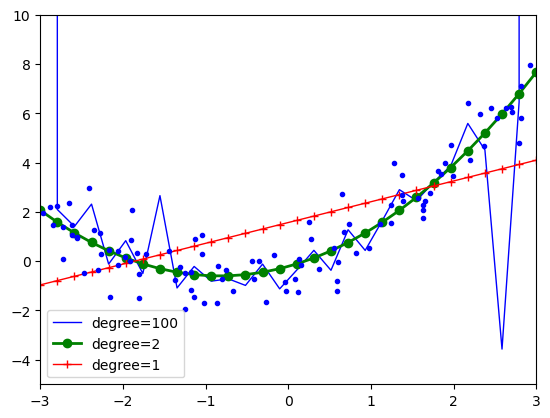

In [333]:
### 测试不同的degree的影响 也就是特征越简单,容易欠拟合, 特征越复杂,容易过拟合
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_test = np.linspace(-3, 3, 30).reshape(-1, 1)
for style, width, degree in (('b-', 1, 100), ('g-o', 2, 2), ('r-+', 1, 1)):
    pipline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('std', StandardScaler()),
        ('linear', LinearRegression())
    ])

    pipline.fit(X, y)
    y_pred = pipline.predict(X_test)
    plt.plot(X_test, y_pred, style, linewidth=width, label=f'degree={degree}')

plt.plot(X, y, 'b.')
plt.legend()
plt.axis((-3, 3, -5, 10))
plt.show()


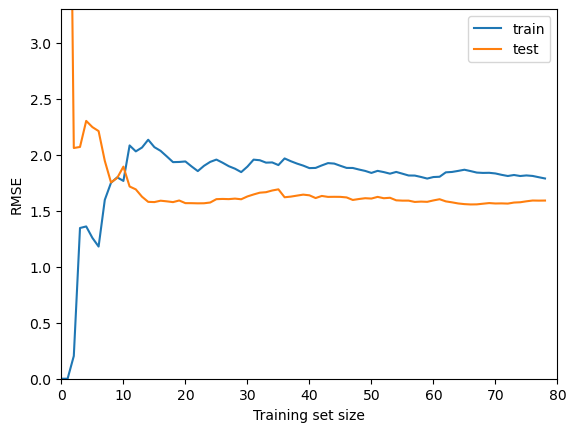

In [353]:
### 数据样本数量对结果的影响 -- 训练样本越小,越容易过拟合(即测试集可以,验证集不行)
### 所以训练数据越多越好,可以降低缝隙,减少过拟合

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + np.random.randn(m, 1)

def plot_learning_curve(estimator, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    m = len(X_train)
    train_errors, test_errors = [], []
    for i in range(1, m):
        X_train_i = X_train[:i]
        y_train_i = y_train[:i]
        estimator.fit(X_train_i, y_train_i)

        y_train_pred = estimator.predict(X_train_i)
        train_mse = mean_squared_error(y_train_i, y_train_pred)
        train_errors.append(train_mse)

        y_test_pred = estimator.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_errors.append(test_mse)

    plt.plot(np.sqrt(train_errors), label='train')
    plt.plot(np.sqrt(test_errors), label='test')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.axis((0, 80, 0, 3.3))
    plt.legend()
    plt.show()

lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)


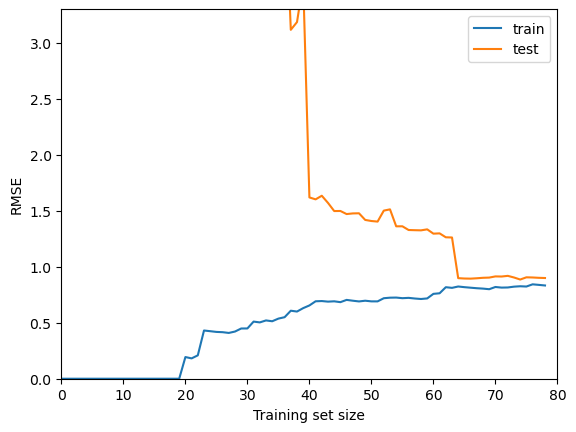

In [360]:
### 特征越复杂,越容易过拟合 多项式回归过拟合
pipline = Pipeline([
    ('poly', PolynomialFeatures(degree=20, include_bias=False)),
    ('linear', LinearRegression())
])
plot_learning_curve(pipline, X, y)

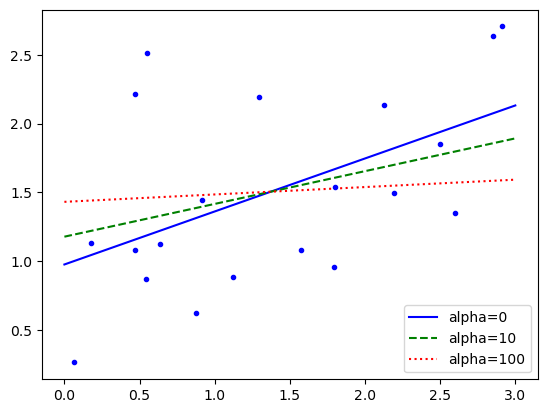

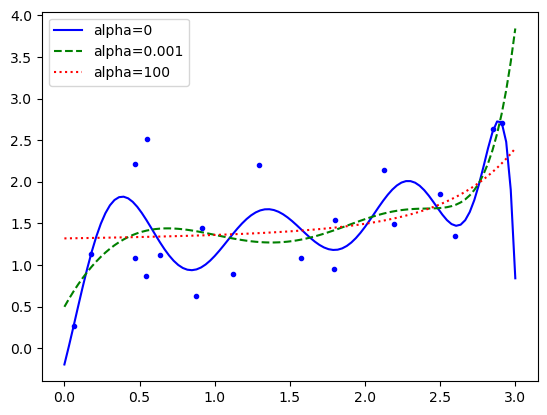

In [375]:
### 正则化
## alpha越大,正则化越强,越平稳
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 0.5 * X + np.random.randn(m, 1)/1.5 + 1
X_new = np.linspace(0, 3, 100).reshape(-1, 1)

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha=alpha, **model_kwargs)
        if polynomial:
            model = Pipeline([
                ('poly', PolynomialFeatures(degree=polynomial, include_bias=False)),
                ('std', StandardScaler()),
                ('model', model)
            ])
        model.fit(X, y)
        y_pred = model.predict(X_new)
        plt.plot(X_new, y_pred, style, label=f'alpha={alpha}')
    plt.plot(X, y, 'b.')
    plt.legend()
    plt.show()

plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plot_model(Ridge, polynomial=10, alphas=(0, 10**-3, 100))


/opt/miniconda3/envs/Python_machine_learning-main/lib/python3.12/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/Python_machine_learning-main/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/Python_machine_learning-main/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.446e+00, tolerance: 9.295e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using on

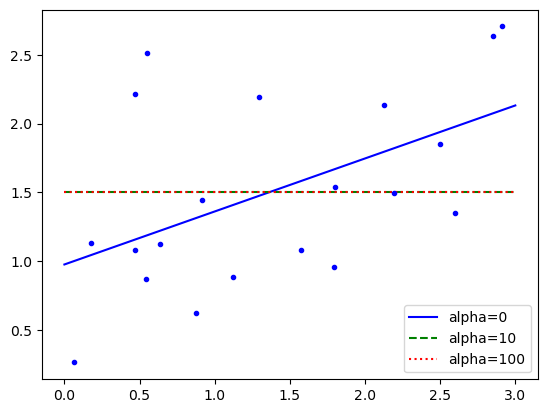

/opt/miniconda3/envs/Python_machine_learning-main/lib/python3.12/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/Python_machine_learning-main/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/Python_machine_learning-main/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using on

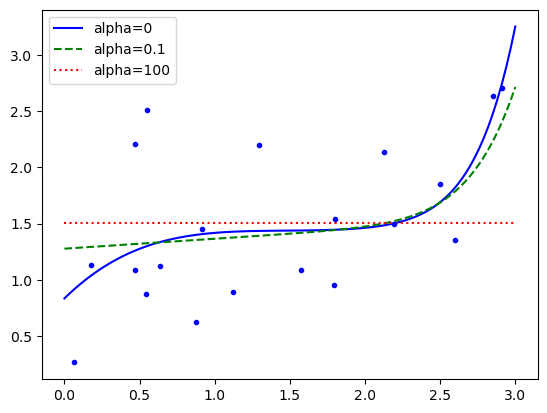

In [378]:
from sklearn.linear_model import Lasso
plot_model(Lasso, polynomial=False, alphas=(0, 10, 100))
plot_model(Lasso, polynomial=10, alphas=(0, 10**-1, 100))